In [33]:
!pip install konlpy

In [0]:
# !sudo apt-get install curl git
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [0]:
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [0]:
# !sudo yum install curl git
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

In [0]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
pd.options.display.max_rows = 50
pd.options.display.max_columns = None
from konlpy.tag import Hannanum, Kkma, Komoran, Mecab, Twitter

In [0]:
hannanum = Hannanum()
kkma = Kkma()
komoran = Komoran()
# input_excelmecab = Mecab()
twitter = Twitter()

In [0]:
# libraries = [hannanum, kkma, komoran, mecab, twitter]
libraries = {'hannanum' : hannanum, 'kkma' : kkma, 'komoran' : komoran, 'twitter' : twitter}
# libraries = {'hannanum' : hannanum}

In [0]:
input_excel = pd.read_excel('./PLAZA_INTENT.xlsx')

In [43]:
print(input_excel.shape)
sample_num = 10000
# input_excel[['NO', 'input']].head(sample_num)
input_excel.head(sample_num)

(4212, 2)


,input,intent
0,신었던 신발을 교환하고 싶어요,교환_신발
1,착화한 신발 환불 가능할까요?,교환_신발
2,신발 교환 방법,교환_신발
3,교환 신발,교환_신발
4,신발 한번밖에 안 신었어요,교환_신발
...,...,...
4207,ak pop 클럽이 뭐에요?,클럽_POPinAK
4208,ak팝이 뭔가요,클럽_POPinAK
4209,Ak pop이 뭐야?,클럽_POPinAK
4210,클럽 POPinAK,클럽_POPinAK


In [44]:
input_excel.loc[input_excel['input'].isnull()].shape

(0, 2)

# Test

In [0]:
# -*- coding: utf-8 -*-
import pandas as pd
%matplotlib inline
from collections import Counter
import math
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
plt.rcParams['axes.unicode_minus'] = False
rc('font', family='AppleGothic')
import nltk
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
import numpy as np

In [0]:
# test_str = "안녕하세요. 저는 박종수라고 합니다. 교환 신청 원합니다."

In [0]:
# nltk_text = nltk.Text(hannanum.nouns(test_str), name = "대한민국헌법")
# nltk_text.plot()

In [0]:
# nltk.download('stopwords')
# # 함께 많이 나타난 단어들을 출력
# nltk_text.collocations()
# print(nltk_text.collocations())

In [0]:
# from nltk.corpus import stopwords
# korean_stops = set(stopwords.words('ko'))
# korean_stops
# # words = ["Can't", 'is', 'a', 'contraction']
# # [word for word in words if word not in english_stops] 

In [50]:
import time
libraries_new = {'hannanum' : hannanum}
start_time = time.time()

inputs = input_excel['input'].values[:sample_num]
arr_list = []
i = 0
for key, value in libraries_new.items():
  arr_ = []
  print('library : ', key)
  try:
    for input_ in inputs:
      i += 1
      if type(input_) != str:
        if math.isnan(input_):
          continue
      # 한 input에서 중복되는 단어는 한 개로 취급
      arr_ += list(set(value.nouns(input_)))
      arr_list.append(arr_)
  except:
    print(i, input_, type(input_), math.isnan(input_))

  cnt = Counter(arr_)
  print(cnt.most_common()[:10])
  print()

print("{:d}개, 수행시간 : {:.1f}초".format(len(inputs), time.time() - start_time))

library :  hannanum
[('상품권', 284), ('수', 251), ('어디', 234), ('가능', 124), ('리', 124), ('문화센터', 123), ('마', 118), ('백화점', 99), ('구매', 95), ('오늘', 95)]

4212개, 수행시간 : 13.4초


In [51]:
import time
start_time = time.time()

inputs = input_excel['input'].values
arr_list = []
i = 0
for key, value in libraries.items():
  arr_ = []
  print('library : ', key)
  try:
    for input_ in inputs:
      i += 1
      if type(input_) != str:
        if math.isnan(input_):
          continue
      # print(list(set(value.nouns(input_))))
      # 한 input에서 중복되는 단어는 한 개로 취급
      arr_ += list(set(value.nouns(input_)))
      arr_list.append(arr_)
  except:
    print(i, input_, type(input_), math.isnan(input_))

  cnt = Counter(arr_)
  print(cnt.most_common()[:10])
  print()

print("{:d}개, 수행시간 : {:.1f}초".format(len(inputs), time.time() - start_time))

library :  hannanum
[('상품권', 284), ('수', 251), ('어디', 234), ('가능', 124), ('리', 124), ('문화센터', 123), ('마', 118), ('백화점', 99), ('구매', 95), ('오늘', 95)]

library :  kkma
[('상품권', 313), ('어디', 283), ('수', 254), ('가능', 233), ('카드', 212), ('문화', 207), ('점', 180), ('가요', 167), ('매장', 167), ('방법', 163)]

library :  komoran
[('수', 357), ('상품권', 313), ('점', 221), ('문화', 207), ('휴', 206), ('방법', 163), ('매장', 162), ('주차', 160), ('센터', 160), ('쿠폰', 157)]

library :  twitter
[('상품권', 312), ('하나요', 214), ('카드', 190), ('어디', 167), ('매장', 165), ('방법', 163), ('수', 161), ('쿠폰', 157), ('버스', 152), ('휴무', 151)]

4212개, 수행시간 : 76.9초


In [52]:
figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 4))
sns.countplot(arr_list[0], ax=axes[0])
sns.countplot(arr_list[1], ax=axes[1])
sns.countplot(arr_list[2], ax=axes[2])
sns.countplot(arr_list[3], ax=axes[3])

KeyboardInterrupt: ignored

Error in callback <function flush_figures at 0x7fdc81a49510> (for post_execute):


KeyboardInterrupt: ignored

### java랑 연동 할 수 있는 방법

### stop words 사용할 수 있는 library, 한국어 가능한지 확인
* nltk 라이브러리 내에서 한국어 지원 안하고, 따로 정의해야 함. 정의할 수 있는 불용어들이 다양하며, 확인 시 for문을 한 번 더 도는 비효율 발생하기 때문에 불용어 제외는 적용하지 않음(set활용하면 시간 비효율은 줄 일 수 있음)

### 시간 복잡도 줄이는 방법

# 작업 목표

* 챗봇을 통해 일주일간 입력 받은 문의 내용의 단어 빈도수 확인하여 상위 10개 출력

# 작업 방법

* Data : AK_mall에 활용한 1만 개의 예문

* 4가지 라이브러리 성능 비교 : hannanum, kkma, komoran, twitter
  * 4가지 라이브러리 결과는 큰 차이 없으나 hannaum이 비교적 좋은 결과를 보임
  * 작업 결과는 아래 참조

* 방법
  * 하나의 input 예제에서 단어 추출. 이 때 한 문장 안에서 중복되는 단어는 하나로 취급하였으며, 명사 중심으로 추출하였음
  * 불용어(불필요한 단어, ex-나, 우리, 근본적으로, 이어서, 아니면 등)를 따로 설정해 제외시키지는 않음
    * 이유 : 조사한 바로는 한국어 불용어 모음집이 불충분하며, 직접 기재하기에는 방대함. 적당한 불용어 모음집이 있을 경우 추후 활용 예정
  * 각 문장에서 추출된 모든 단어를 취합한 뒤에 전체를 대상으로 단어 counting


# 작업 결과

ex- (반품, 4207) : '반품' 단어는 총 4207회 확인 됨

* library :  hannanum

  [('반품', 4207), ('배송', 2886), ('교환', 1666), ('수', 571), ('색상', 566), ('사이즈(or', 565), ('상품', 564), ('날짜', 564), ('요', 564), ('불량', 479)]

* library :  kkma

  [('반품', 4367), ('배송', 3147), ('교환', 1734), ('부탁', 666), ('완료', 632), ('수', 571), ('색상', 566), ('사이즈', 566), ('상품', 564), ('날짜', 564)]

* library :  komoran

  [('반품', 4367), ('부탁', 3848), ('배', 3138), ('송', 3058), ('교환', 1666), ('완료', 632), ('수', 577), ('색상', 566), ('사이즈', 566), ('상품', 564)]

* library :  twitter

  [('반품', 4367), ('언제', 3327), ('배송', 3144), ('교환', 1734), ('완료', 632), ('색상', 566), ('를', 566), ('사이즈', 566), ('상품', 564), ('날짜', 564)]



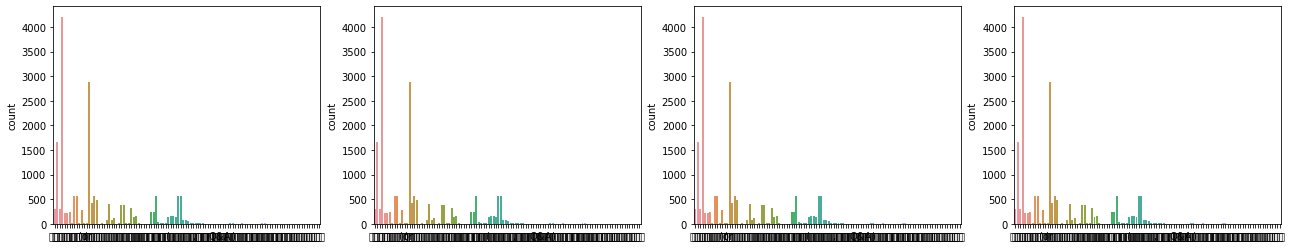

In [27]:
figure, axes = plt.subplots(nrows=1, ncols=4, figsize=(22, 4))
sns.countplot(arr_list[0], ax=axes[0])
sns.countplot(arr_list[1], ax=axes[1])
sns.countplot(arr_list[2], ax=axes[2])
sns.countplot(arr_list[3], ax=axes[3])

# 이슈 사항

* 현재 python 및 python library를 활용해 작업하고 있는데, java spring 프레임워크에서 그대로 활용 가능한지 여부

  => 직접 경험한 적은 없으나 인터넷을 통해 알아본 결과 가능하다고 함. 정확하게 확인 필요

* 10,000개의 샘플을 형태소 분석 및 counting하는 데 평균 20초 소요

  => 보다 효율적인 알고리즘 적용 필요

# 작업 계획

* 위의 두 가지 이슈 사항

* 일괄 테스트(예제 샘플이 담긴 파일 업로드 시, 각 예제에 해당하는 출력 결과를 파일 형태로 반환) skill_id 단위 작업